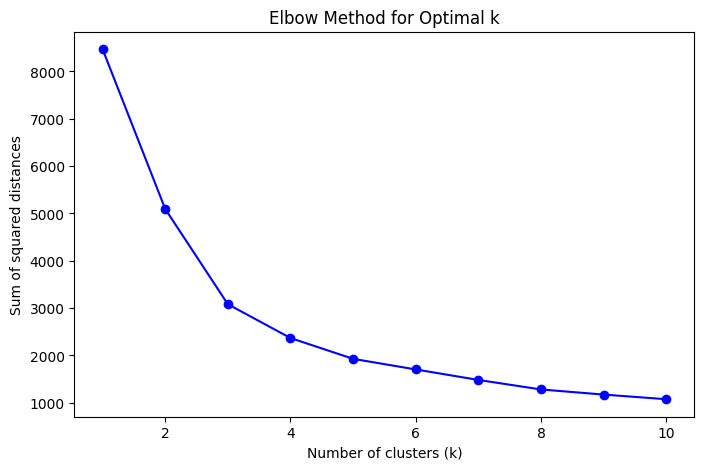

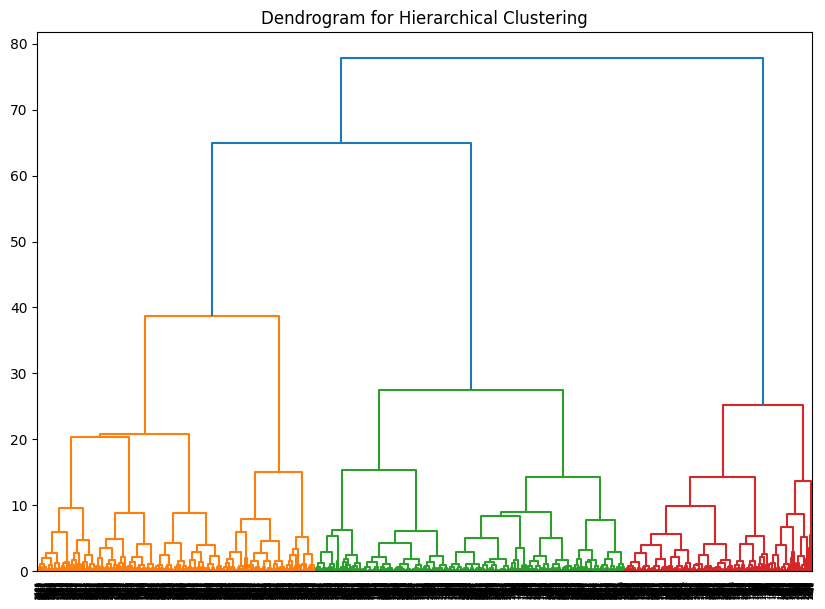

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
data = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')

# Feature selection (select relevant features for clustering)
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']

# Preprocess the data
data_features = data[features]

# Normalize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means clustering
optimal_k = 3  # Based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# Apply hierarchical clustering
linked = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()
